In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
df = pd.read_csv('/content/temperatures.csv')

In [59]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [60]:
df.isnull().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


In [61]:
X = df[['YEAR']]
y = df.drop(columns=['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Square Score: {r2}")

Mean Squared Error (MSE): 0.4943825239306672
Mean Absolute Error (MAE): 0.502818961105495
R-Square Score: 0.2906453173374413


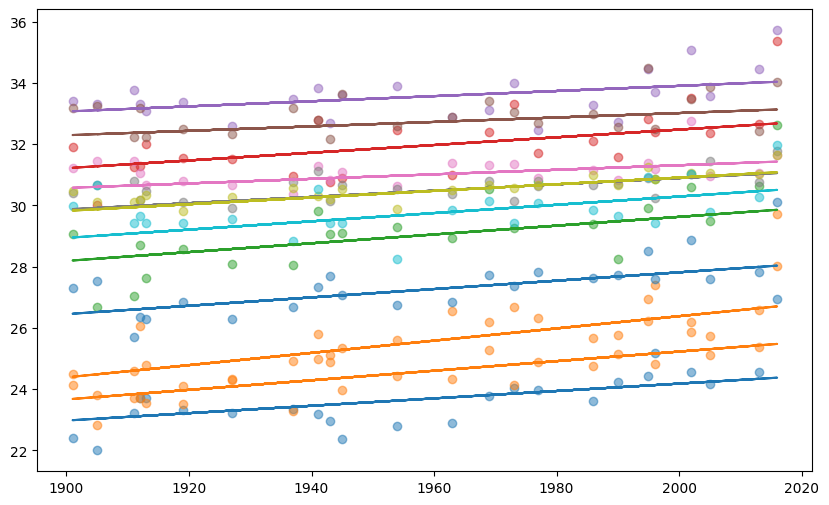

In [66]:
plt.figure(figsize=(10,6))
for month in y.columns:
    plt.scatter(X_test, y_test[month], label=f"Actual {month}", alpha=0.5)
    plt.plot(X_test, y_pred[:, y.columns.get_loc(month)], label=f"Predicted {month}")